# Alessio Reitano - Matricola 0001005384

In [21]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

#Variables
url = 'exam2022_01_13(1).csv'
sep =','
random_state = 42
target = 'language'

#Directives
%matplotlib inline
np.random.seed(random_state)

### 1. Load the data and explore them, showing size, structure and histograms of numeric data; show the histogram of the frequencies of the class labels, contained in the “language” column

In [22]:
#Load the data
df = pd.read_csv(url, sep = sep)
#Show the size
print ("The size is: {}".format(df.shape))


The size is: (329, 13)


In [23]:
#Show the structure of DataFrame
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,321.000000,329.000000,329.000000
mean,5.645227,-4.270814,2.635319,7.200207,-5.648733,9.810236,-9.408053,5.117328,-1.229432,-2.411215,2.430833,-3.980415
std,5.105302,3.514350,3.635323,4.310095,4.596180,3.624654,2.484117,2.650608,3.634849,5.027840,3.478467,2.985879
min,-6.067831,-14.972962,-6.186583,-8.844231,-15.656596,-3.528964,-15.365665,-2.873862,-15.510974,-11.429178,-13.664104,-13.724103
25%,2.065603,-6.515764,0.137042,4.700874,-8.417684,8.643563,-11.120860,3.482167,-1.749082,-5.090180,1.197789,-5.941409
50%,4.954206,-4.252512,2.029268,7.804680,-6.786670,10.379330,-9.710399,4.843103,-0.389970,-3.327718,3.169703,-4.374334
75%,9.793648,-1.560250,4.178026,10.129165,-4.463308,11.784360,-7.989370,6.588931,0.779993,-1.512083,4.673452,-2.191658
max,17.749851,3.570765,17.066487,16.178942,7.912809,21.445837,-0.424033,13.846083,4.789989,16.326455,9.166066,5.259430


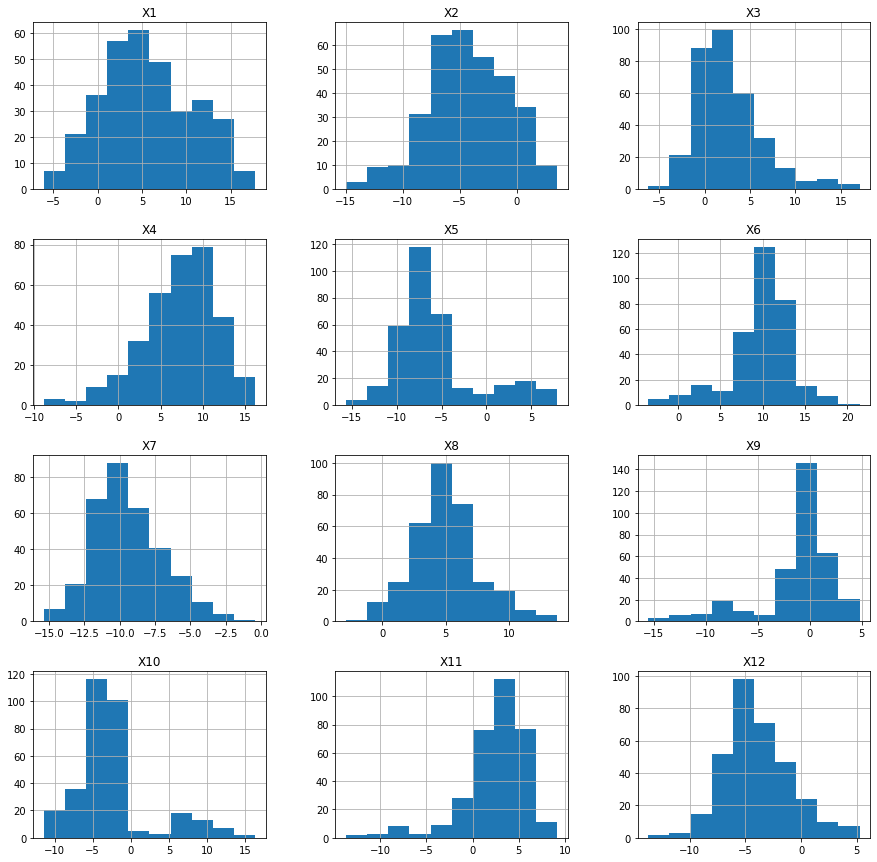

In [24]:
#Show the histogram
pd.DataFrame.hist(df, figsize= [15,15]);

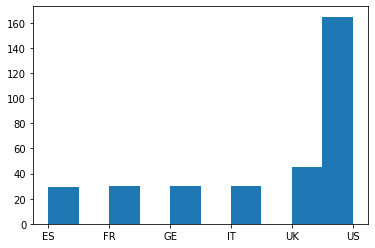

In [25]:
#Show the histogram
plt.hist(df.language)
plt.show()

### 2. Drop the rows with NaN values, if any, show the shape of the dataset after this cleaning

In [26]:
#Drop rows with null values
df = df.dropna()
print ("The rows after cleaning are: {}".format(df.shape[0]))

The rows after cleaning are: 321


### 3. Tune the hyper–parameters of Model1 with Cross Validation on the training set, optimize for recall_macro

In [27]:
#Decide as Model1 DecisionTreeClassifier
X = df.drop(columns = [target])
y = df[target]

In [28]:
#Split X and y in train and test
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=random_state)
print ("There are {} samples in the training dataset".format(Xtrain.shape[0]))
print ("There are {} samples in the testing dataset".format(Xtest.shape[0]))
print ("Each samples has {} features".format(Xtrain.shape[1]))

There are 240 samples in the training dataset
There are 81 samples in the testing dataset
Each samples has 12 features


In [29]:
#Create the model1
model1 = DecisionTreeClassifier(criterion='entropy',random_state = random_state)
#Fit the classifier
model1.fit(Xtrain, ytrain)
param = range(1, model1.tree_.max_depth+1)

In [40]:
scores = []

for par in param :
    model1 = DecisionTreeClassifier(criterion = 'entropy', max_depth = par, random_state = random_state)
    score = cross_val_score(model1, Xtrain, ytrain, scoring = 'recall_macro', cv=5)
    scores.append(np.mean(score))
    #scores.append(sum(score) / len(score))
print (scores)


[0.16666666666666666, 0.34074879227053134, 0.43878881987577645, 0.5343650793650794, 0.5680607315389923, 0.5140527950310558, 0.533616287094548, 0.5462750172532781, 0.5514354727398205, 0.5552035886818495]


### 4. produce a classification report for Model1 on the test set

In [31]:
too_par = param[np.argmax(scores)]                          #prende l'indice il risultato migliore , best score
model1 = DecisionTreeClassifier(max_depth = too_par, criterion = 'entropy',random_state=random_state)
model1.fit(Xtest,ytest)
ytest_model = model1.predict(Xtest)
#Calculate the accuracy
accuracy = accuracy_score(ytest,ytest_model)*100
print("The accuracy on test set tuned with cross_validation with Model1 is {:.2f}% with depth {}".format(accuracy,too_par))

The accuracy on test set tuned with cross_validation with Model1 is 92.59% with depth 5


In [32]:
print (classification_report(ytest,ytest_model))

              precision    recall  f1-score   support

          ES       1.00      1.00      1.00         8
          FR       0.88      1.00      0.93         7
          GE       1.00      1.00      1.00         9
          IT       0.73      1.00      0.85        11
          UK       0.80      0.67      0.73         6
          US       1.00      0.90      0.95        40

    accuracy                           0.93        81
   macro avg       0.90      0.93      0.91        81
weighted avg       0.94      0.93      0.93        81



### 5. produce the confusion matrix for Model1 on the test set

In [33]:
confusion_matrix(ytest,ytest_model)

array([[ 8,  0,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0,  0],
       [ 0,  0,  9,  0,  0,  0],
       [ 0,  0,  0, 11,  0,  0],
       [ 0,  0,  0,  2,  4,  0],
       [ 0,  1,  0,  2,  1, 36]], dtype=int64)

### 6. tune the hyper–parameters of Model2 with Cross Validation on the training set, optimize for recall_macro

In [34]:
#Decide as Model2
model2 = KNeighborsClassifier()
param2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [35]:
scores2 = []
for i in param2 :
    model2 = KNeighborsClassifier(n_neighbors = i, metric = 'euclidean')
    score2 = cross_val_score(model2, Xtrain, ytrain, scoring = 'recall_macro', cv=5)
    scores2.append(np.mean(score2))
print (scores2)

[0.7903260869565217, 0.7532367149758454, 0.7618926846100759, 0.7510990338164251, 0.7236197377501725, 0.7337405106970324, 0.673719806763285, 0.6430641821946169, 0.6301293995859213, 0.6206452726017944]


### 7. produce a classification report for Model2 on the test set

In [36]:
too_par = param[np.argmax(scores2)]
model2 = KNeighborsClassifier(n_neighbors = too_par, metric = 'euclidean')
model2.fit(Xtest,ytest)
ytest_model = model2.predict(Xtest)
accuracy = accuracy_score(ytest,ytest_model)*100
print("The accuracy on test set tuned with cross_validation with Model2 is {:.2f}% with depth {}".format(accuracy,too_par))

The accuracy on test set tuned with cross_validation with Model2 is 100.00% with depth 1


In [37]:
print (classification_report(ytest,ytest_model))

              precision    recall  f1-score   support

          ES       1.00      1.00      1.00         8
          FR       1.00      1.00      1.00         7
          GE       1.00      1.00      1.00         9
          IT       1.00      1.00      1.00        11
          UK       1.00      1.00      1.00         6
          US       1.00      1.00      1.00        40

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81



### 8. produce the confusion matrix for Model2 on the test set

In [38]:
confusion_matrix(ytest,ytest_model)

array([[ 8,  0,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0,  0],
       [ 0,  0,  9,  0,  0,  0],
       [ 0,  0,  0, 11,  0,  0],
       [ 0,  0,  0,  0,  6,  0],
       [ 0,  0,  0,  0,  0, 40]], dtype=int64)